<a href="https://colab.research.google.com/github/Duckkapon/Portfolio/blob/main/develop_customer_segmentation_to_define_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Develop customer segmentation to define marketing strategy for creddit card customer

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
df_original = pd.read_csv("/kaggle/input/ccdata/CC GENERAL.csv")
df_credit = df_original.iloc[:,1:].copy()
df_credit.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Business Backgound

The business involves credit card services, where the company has 9000 active credit card holders. The dataset provides insights into the usage behavior of these customers over the last 6 months, with 18 behavioral variables captured at the customer level. The company aims to develop a customer segmentation strategy to enhance its marketing efforts.

## Objective

To define a robust customer segmentation strategy based on the behavioral variables to optimize marketing efforts. By understanding the diverse needs and behaviors of different customer segments, the company can tailor its marketing strategies, promotions, and communication to effectively engage and retain customers. The goal is to maximize customer satisfaction, increase loyalty, and drive revenue growth.

## Preprocessing

Check missing values

In [ ]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [ ]:
df_credit.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
df_corr = df_credit.corr()[["CREDIT_LIMIT", "MINIMUM_PAYMENTS"]]
df_dropna_corr = df_credit.dropna().corr()[["CREDIT_LIMIT", "MINIMUM_PAYMENTS"]].rename(columns={"CREDIT_LIMIT": "CREDIT_LIMIT_dropna", "MINIMUM_PAYMENTS": "MINIMUM_PAYMENTS_dropna"})
pd.concat([df_corr, df_dropna_corr], axis=1)

,CREDIT_LIMIT,MINIMUM_PAYMENTS,CREDIT_LIMIT_dropna,MINIMUM_PAYMENTS_dropna
BALANCE,0.531283,0.398684,0.535518,0.398669
BALANCE_FREQUENCY,0.095843,0.132569,0.087682,0.132519
PURCHASES,0.356963,0.093860,0.358425,0.093842
ONEOFF_PURCHASES,0.319724,0.048755,0.320613,0.048741
INSTALLMENTS_PURCHASES,0.256499,0.132172,0.258057,0.132156
CASH_ADVANCE,0.303985,0.140107,0.304161,0.140094
PURCHASES_FREQUENCY,0.119788,0.003030,0.121372,0.002979
ONEOFF_PURCHASES_FREQUENCY,0.295038,-0.030327,0.295432,-0.030357
PURCHASES_INSTALLMENTS_FREQUENCY,0.060755,0.030073,0.063421,0.030036
CASH_ADVANCE_FREQUENCY,0.132616,0.098838,0.132841,0.098844


In [ ]:
df_credit = df_credit.dropna()

Check outlier

<Axes: >

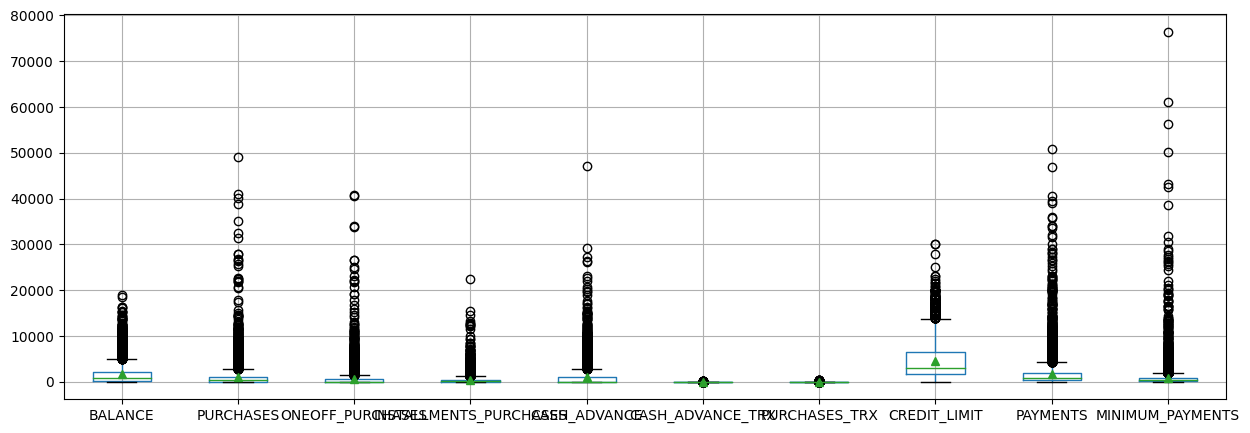

In [ ]:
cols = [col for col in df_credit.columns if max(df_credit[col]) > 12]
df_credit.boxplot(column = cols, figsize = (15,5), showmeans = True)

<Axes: >

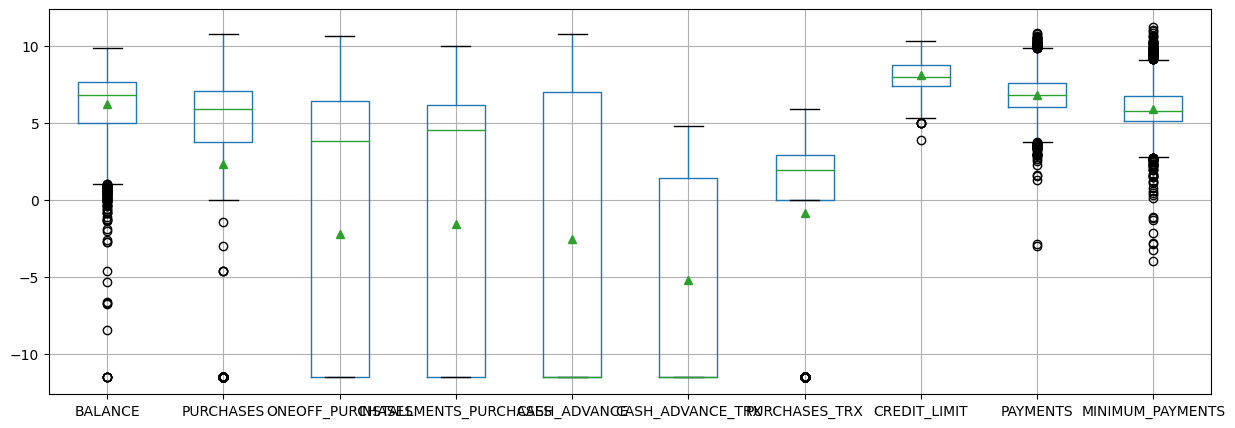

In [ ]:
# log-transformation
df_credit.loc[:, cols] = np.log(df_credit.loc[:, cols]+0.00001)
df_credit.boxplot(column = cols, figsize = (15,5), showmeans = True)

In [ ]:
# IQR
outlinerIQR = dict()

for c in cols :
    Q1 = np.percentile(df_credit[c], 25)
    Q3 = np.percentile(df_credit[c], 75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    mask = (df_credit[c] < lower) | (df_credit[c] > upper)
    outlinerIQR[c] = len(df_credit[mask][c].index)
outlinerIQR

{'BALANCE': 99,
 'PURCHASES': 1972,
 'ONEOFF_PURCHASES': 0,
 'INSTALLMENTS_PURCHASES': 0,
 'CASH_ADVANCE': 0,
 'CASH_ADVANCE_TRX': 0,
 'PURCHASES_TRX': 1967,
 'CREDIT_LIMIT': 6,
 'PAYMENTS': 99,
 'MINIMUM_PAYMENTS': 145}

<Axes: >

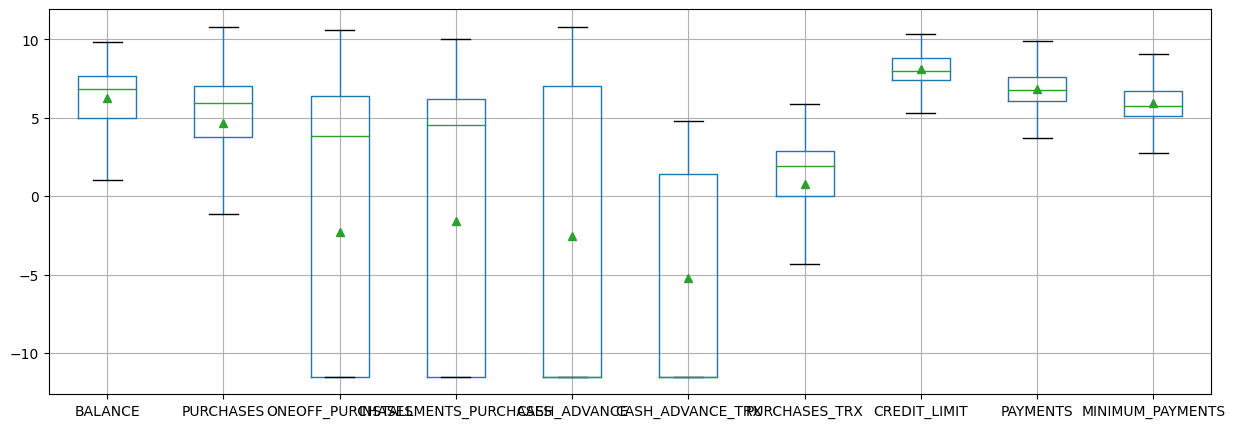

In [ ]:
# IQR
for c in cols :
    Q1 = np.percentile(df_credit[c], 25)
    Q3 = np.percentile(df_credit[c], 75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR

    # Floor & Ceiling
    mask_low = (df_credit[c] < lower)
    idx_low =  list(df_credit[mask_low][c].index)
    df_credit.loc[idx_low, c] = lower

    mask_up = (df_credit[c] > upper)
    idx_up =  list(df_credit[mask_up][c].index)
    df_credit.loc[idx_up, c] = upper

df_credit.boxplot(column = cols, figsize = (15,5), showmeans = True)

Standardization

In [ ]:
# standardization
df_credit_std = StandardScaler().fit_transform(df_credit)


## K-Means Clustering

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

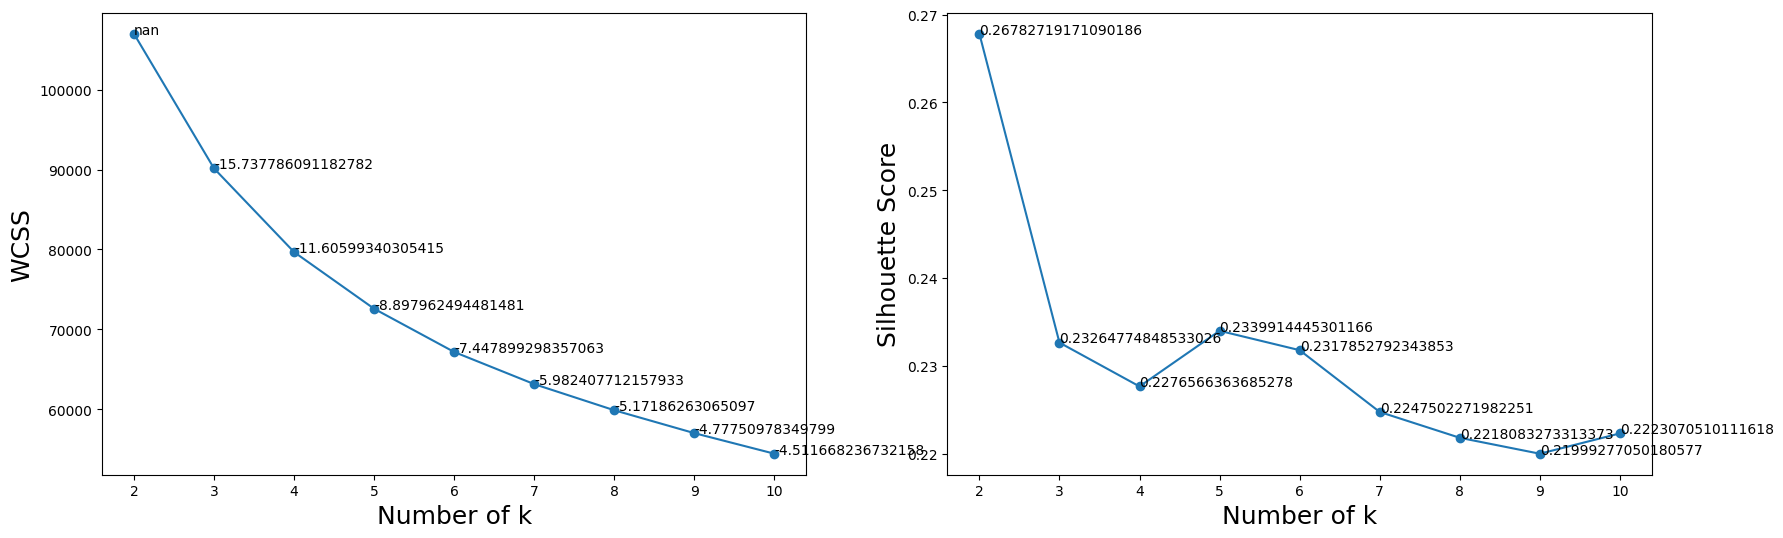

In [ ]:
# get the value of k using elbow method (wcss)
num_k = range(2, 11)
wcss = []
silhouette_scores = []
for k in num_k:
    kmeans = KMeans(n_clusters=k).fit(df_credit_std)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_credit_std, kmeans.fit_predict(df_credit_std)))

df_wcss = pd.DataFrame({"k": num_k, "wcss": wcss})
df_wcss["percent_change"] = df_wcss["wcss"].pct_change()*100

# plot wcss with percent change
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].plot(num_k, wcss, "o-")
ax[0].set_xlabel("Number of k", fontsize=18)
ax[0].set_ylabel("WCSS", fontsize=18)
ax[1].plot(num_k, silhouette_scores, "o-")
ax[1].set_xlabel("Number of k", fontsize=18)
ax[1].set_ylabel("Silhouette Score", fontsize=18)
for i, k in enumerate(df_wcss["k"]):
    ax[0].annotate(str(df_wcss["percent_change"][i]), (k, wcss[i]))
    ax[1].annotate(str(silhouette_scores[i]), (k, silhouette_scores[i]))
plt.show()

### Try Feature Selection

In [ ]:
df_credit_selected = df_original.copy()
df_credit_selected["AVG_PURCHASES"] = df_credit_selected["PURCHASES"]/df_credit_selected["PURCHASES_TRX"]
df_credit_selected["AVG_CASH_ADVANCE"] = df_credit_selected["CASH_ADVANCE"]/df_credit_selected["CASH_ADVANCE_TRX"]
df_credit_selected = df_credit_selected[["AVG_PURCHASES", "AVG_CASH_ADVANCE", "PAYMENTS", "PRC_FULL_PAYMENT"]]
df_credit_selected.head()

,AVG_PURCHASES,AVG_CASH_ADVANCE,PAYMENTS,PRC_FULL_PAYMENT
0,47.700000,NaN,201.802084,0.000000
1,NaN,1610.736371,4103.032597,0.222222
2,64.430833,NaN,622.066742,0.000000
3,1499.000000,205.788017,0.000000,0.000000
4,16.000000,NaN,678.334763,0.000000


In [ ]:
df_credit_selected.isnull().sum()

AVG_PURCHASES       2041
AVG_CASH_ADVANCE    4628
PAYMENTS               0
PRC_FULL_PAYMENT       0
dtype: int64

In [ ]:
df_credit_selected = df_credit_selected.fillna(0)
df_credit_selected.replace([np.inf, -np.inf], 0, inplace=True)
df_credit_selected

,AVG_PURCHASES,AVG_CASH_ADVANCE,PAYMENTS,PRC_FULL_PAYMENT
0,47.700000,0.000000,201.802084,0.000000
1,0.000000,1610.736371,4103.032597,0.222222
2,64.430833,0.000000,622.066742,0.000000
3,1499.000000,205.788017,0.000000,0.000000
4,16.000000,0.000000,678.334763,0.000000
...,...,...,...,...
8945,48.520000,0.000000,325.594462,0.500000
8946,50.000000,0.000000,275.861322,0.000000
8947,28.880000,0.000000,81.270775,0.250000
8948,0.000000,18.279389,52.549959,0.250000


Standardization

In [ ]:
# standardization
df_credit_selected_std = StandardScaler().fit_transform(df_credit_selected)

Performing K-Means Clustering

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

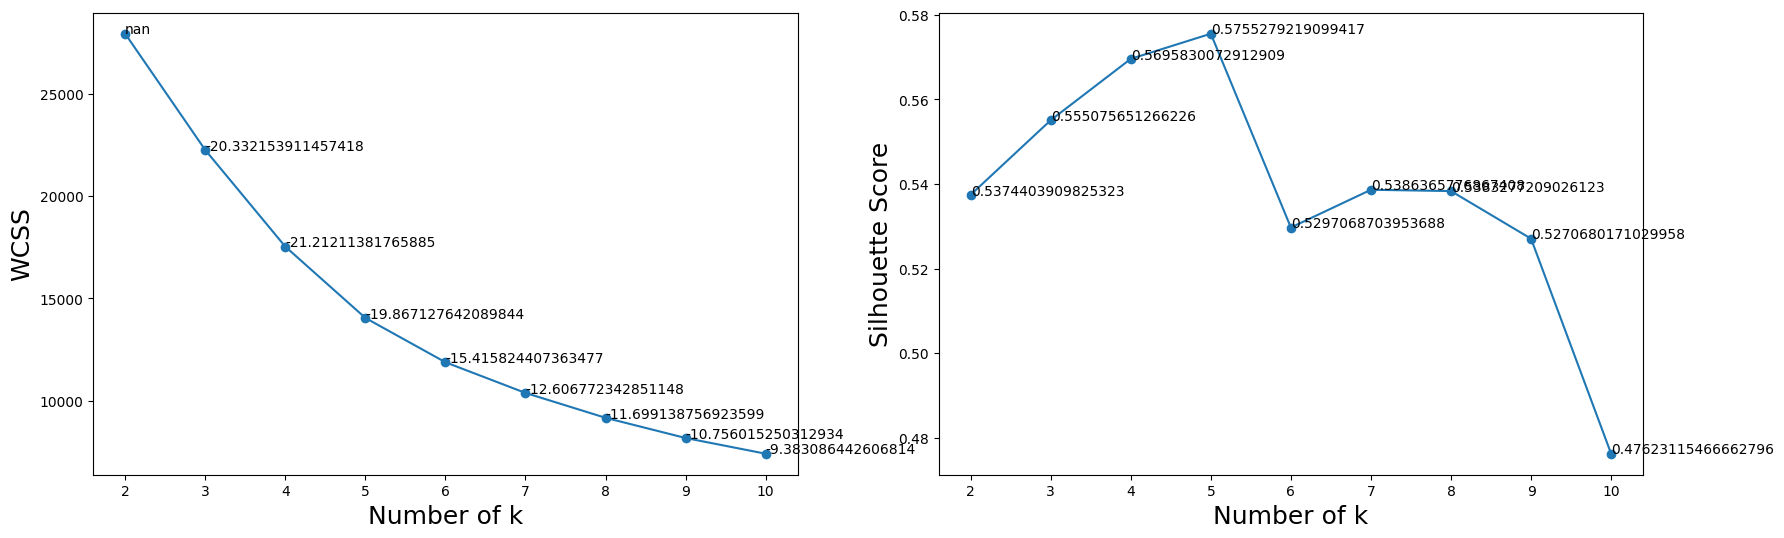

In [ ]:
# get the value of k using elbow method (wcss)
num_k = range(2, 11)
wcss = []
silhouette_scores = []
for k in num_k:
    kmeans = KMeans(n_clusters=k, random_state=20230825).fit(df_credit_selected_std)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_credit_selected_std, kmeans.fit_predict(df_credit_selected_std)))

df_wcss = pd.DataFrame({"k": num_k, "wcss": wcss})
df_wcss["percent_change"] = df_wcss["wcss"].pct_change()*100

# plot wcss with percent change
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].plot(num_k, wcss, "o-")
ax[0].set_xlabel("Number of k", fontsize=18)
ax[0].set_ylabel("WCSS", fontsize=18)
ax[1].plot(num_k, silhouette_scores, "o-")
ax[1].set_xlabel("Number of k", fontsize=18)
ax[1].set_ylabel("Silhouette Score", fontsize=18)
for i, k in enumerate(df_wcss["k"]):
    ax[0].annotate(str(df_wcss["percent_change"][i]), (k, wcss[i]))
    ax[1].annotate(str(silhouette_scores[i]), (k, silhouette_scores[i]))
plt.show()

Show that the optimal number of clustering is 5

In [ ]:
# found the best k = 5
k = 5
kmeans = KMeans(n_clusters=k, random_state=20230825).fit(df_credit_selected_std)
cluster_center = pd.DataFrame(kmeans.cluster_centers_, columns=df_credit_selected.columns)
cluster_center["cluster"] = [f"cluster {i}" for i in range(1, k+1)]
cluster_center

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,AVG_PURCHASES,AVG_CASH_ADVANCE,PAYMENTS,PRC_FULL_PAYMENT,cluster
0,-0.015133,-0.334940,-0.050572,2.153298,cluster 1
1,-0.114051,-0.019583,-0.170312,-0.402551,cluster 2
2,6.216281,-0.113271,0.455081,-0.369291,cluster 3
3,-0.270555,10.765512,1.825692,-0.113269,cluster 4
4,0.093107,0.604279,3.637345,0.175012,cluster 5


## Insights and Proposing Marketing Strategic
|    |   AVG_PURCHASES |   AVG_CASH_ADVANCE |   PAYMENTS |   PRC_FULL_PAYMENT | cluster   |
|---:|----------------:|-------------------:|-----------:|-------------------:|:----------|
|  0 |      -0.0151329 |         -0.33494   | -0.0505718 |           2.1533   | cluster 1 |
|  1 |      -0.114051  |         -0.0195832 | -0.170312  |          -0.402551 | cluster 2 |
|  2 |       6.21628   |         -0.113271  |  0.455081  |          -0.369291 | cluster 3 |
|  3 |      -0.270555  |         10.7655    |  1.82569   |          -0.113269 | cluster 4 |
|  4 |       0.0931072 |          0.604279  |  3.63735   |           0.175012 | cluster 5 |




### Cluster 1:
- **AVG_PURCHASES:** This group exhibits spending behavior through credit cards lower than the average.
- **AVG_CASH_ADVANCE:** There is very minimal cash advance taken.
- **PAYMENTS:** The repayment amount is slightly below the average.
- **PRC_FULL_PAYMENT:** This cluster tends to make full payments more frequently than other clusters, indicating cautious spending.

The marketing strategy for this group may involve promoting responsible credit card usage, offering rewards or incentives for full payments, and providing financial planning advice to encourage more card usage in purchases.


### Cluster 2:
- **AVG_PURCHASES:** This group also has spending behavior through credit cards lower than the average.
- **AVG_CASH_ADVANCE:** There is a minimal amount of cash advance.
- **PAYMENTS:** The repayment amount is lower than the average.
- **PRC_FULL_PAYMENT:** Full payments are less common.

This cluster represents customers in this cluster use credit cards as necessary, they usualy use cash advance and may tend to overdue. The marketing strategy for this group might focus on encouraging more frequent payments through special privileges received upon full payment or offering balance transfer options, along with providing incentives for everyday card usage.


### Cluster 3:
- **AVG_PURCHASES:** This group exhibits significantly higher spending behavior through credit cards than the average.
- **AVG_CASH_ADVANCE:** There is very minimal cash advance taken.
- **PAYMENTS:** The repayment amount is higher than the average.
- **PRC_FULL_PAYMENT:** Full payments are less common.

This cluster represents customers with high spending, relatively responsible payment behavior. The marketing strategy for this group may involve premium rewards for high spending, special offers for luxury products, and support to encourage even higher full payments through exclusive privileges.


### Cluster 4:
- **AVG_PURCHASES:** This group exhibits spending behavior through credit cards lower than the average.
- **AVG_CASH_ADVANCE:** There is a significant amount of cash advance.
- **PAYMENTS:** The repayment amount is higher than the average.
- **PRC_FULL_PAYMENT:** Full payments are less common.

This cluster represents customers who frequently use cash advance, potentially spending in establishments that do not accept credit cards. Marketing strategies for this group may involve educating them about the associated costs of cash advances and offering alternative financial products with lower interest rates.


### Cluster 5:
- **AVG_PURCHASES:** This group has spending behavior through credit cards higher than the average.
- **AVG_CASH_ADVANCE:** There is some cash advance activity.
- **PAYMENTS:** The repayment amount is significantly higher than the average.
- **PRC_FULL_PAYMENT:** They make full payments partially.

This cluster represents customers who make frequent purchases and pay back a substantial amount. Marketing strategies for this group may involve offering premium rewards and encouraging them to use their cards more for increased benefits.
Please not: the suggested marketing strategies are general recommendations, and further analysis and understanding of the specific customer preferences and behaviors may be required for more targeted and effective strategies.